<a href="https://colab.research.google.com/github/dayanaviana/WGU/blob/main/207-DataExploration_Project/CHURN_3_T_Tests_QuantitativeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-Sample T-Test

H0: SampleMean1 == SampleMean2

H1: SampleMean1 != SampleMean2

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




Income
T-Test 2-Sample:  Ttest_indResult(statistic=0.5936894196669502, pvalue=0.552733291902922)
Z-Test 2-Sample:  (0.5936894196669502, 0.5527198609032289)

Accept H0. Samples are not significantly different.
Churn_YES_Mean ( 40085.76 ) == ( 39706.40 ) Churn_NO_Mean




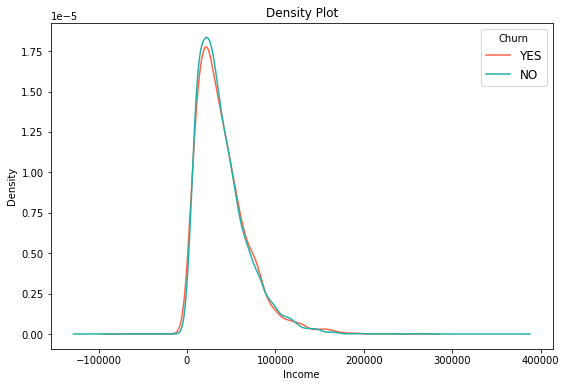



Tenure
T-Test 2-Sample:  Ttest_indResult(statistic=-55.52487046681211, pvalue=0.0)
Z-Test 2-Sample:  (-55.52487046681211, 0.0)

Reject H0. Samples are different.
Churn_YES_Mean ( 13.15 ) != ( 42.23 ) Churn_NO_Mean




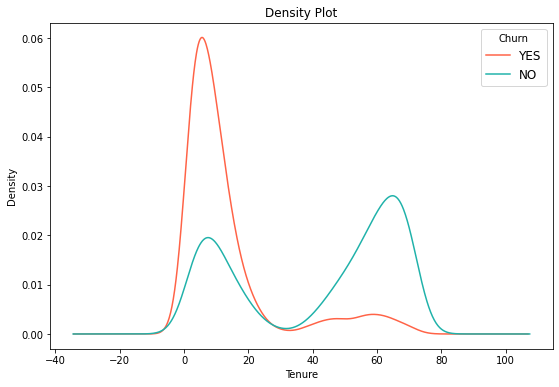



Outage_sec_perweek
T-Test 2-Sample:  Ttest_indResult(statistic=-0.015639241921385327, pvalue=0.98752251103374)
Z-Test 2-Sample:  (-0.015639241921385327, 0.9875221989793459)

Accept H0. Samples are not significantly different.
Churn_YES_Mean ( 10.00 ) == ( 10.00 ) Churn_NO_Mean




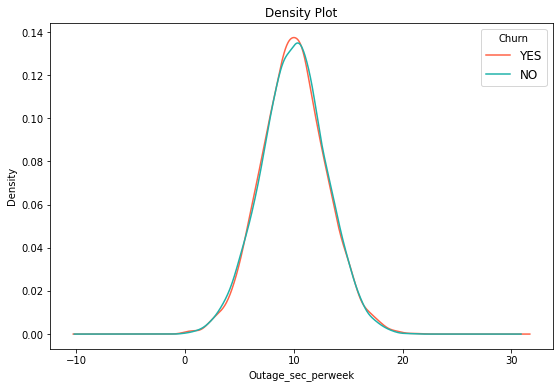



MonthlyCharge
T-Test 2-Sample:  Ttest_indResult(statistic=40.189476722374266, pvalue=0.0)
Z-Test 2-Sample:  (40.189476722374266, 0.0)

Reject H0. Samples are different.
Churn_YES_Mean ( 199.30 ) != ( 163.01 ) Churn_NO_Mean




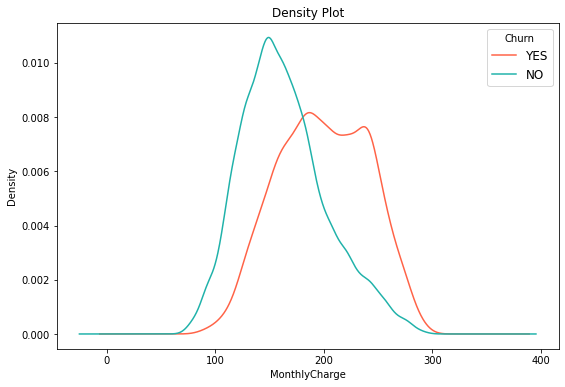



Bandwidth_GB_Year
T-Test 2-Sample:  Ttest_indResult(statistic=-49.22372261953203, pvalue=0.0)
Z-Test 2-Sample:  (-49.22372261953203, 0.0)

Reject H0. Samples are different.
Churn_YES_Mean ( 1785.01 ) != ( 3971.86 ) Churn_NO_Mean




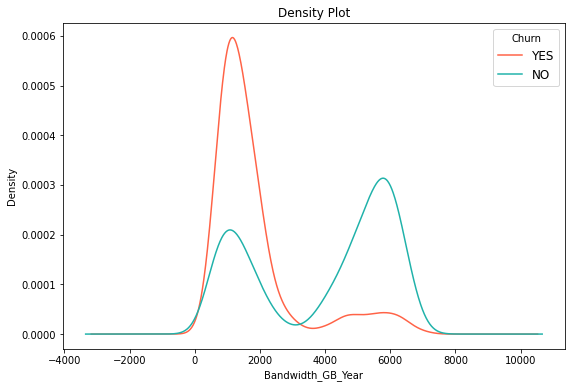



Population
T-Test 2-Sample:  Ttest_indResult(statistic=-0.8532835320931161, pvalue=0.3935225316866866)
Z-Test 2-Sample:  (-0.8532835320931161, 0.3935020901100088)

Accept H0. Samples are not significantly different.
Churn_YES_Mean ( 9551.46 ) == ( 9830.51 ) Churn_NO_Mean




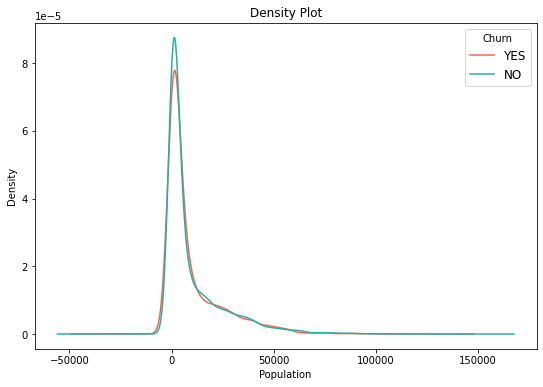



Children
T-Test 2-Sample:  Ttest_indResult(statistic=-0.426361661528078, pvalue=0.6698535122610998)
Z-Test 2-Sample:  (-0.426361661528078, 0.6698443330993735)

Accept H0. Samples are not significantly different.
Churn_YES_Mean ( 2.07 ) == ( 2.09 ) Churn_NO_Mean




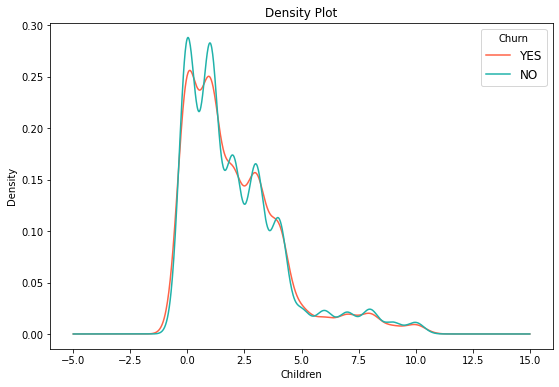



Age
T-Test 2-Sample:  Ttest_indResult(statistic=0.562908145383722, pvalue=0.573510055486891)
Z-Test 2-Sample:  (0.562908145383722, 0.5734974333671894)

Accept H0. Samples are not significantly different.
Churn_YES_Mean ( 53.27 ) == ( 53.01 ) Churn_NO_Mean




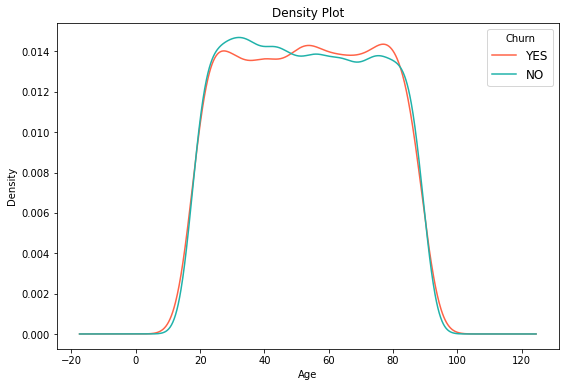



Yearly_equip_failure
T-Test 2-Sample:  Ttest_indResult(statistic=-1.592755629337239, pvalue=0.11124663475844035)
Z-Test 2-Sample:  (-1.592755629337239, 0.1112150225527322)

Accept H0. Samples are not significantly different.
Churn_YES_Mean ( 0.38 ) == ( 0.40 ) Churn_NO_Mean




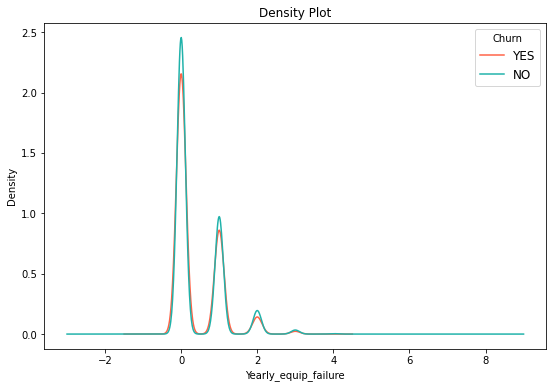



Email
T-Test 2-Sample:  Ttest_indResult(statistic=1.2325944156039008, pvalue=0.21775610450205743)
Z-Test 2-Sample:  (1.2325944156039008, 0.21772712145467432)

Accept H0. Samples are not significantly different.
Churn_YES_Mean ( 12.08 ) == ( 11.99 ) Churn_NO_Mean




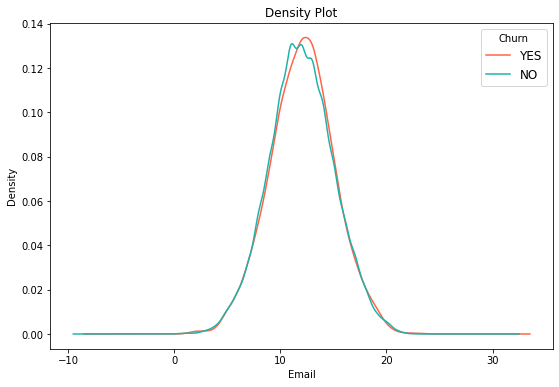



Contacts
T-Test 2-Sample:  Ttest_indResult(statistic=0.8566219322168955, pvalue=0.3916743913251065)
Z-Test 2-Sample:  (0.8566219322168955, 0.39165386066757024)

Accept H0. Samples are not significantly different.
Churn_YES_Mean ( 1.01 ) == ( 0.99 ) Churn_NO_Mean




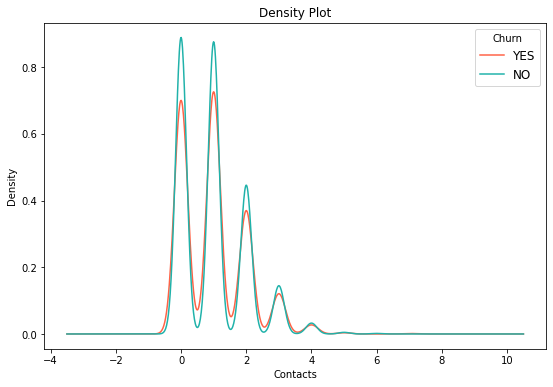


SUMMARY: 
Difference exists inside these features
{
    "Tenure": [
        -55.52487046681211,
        0.0
    ],
    "Bandwidth_GB_Year": [
        -49.22372261953203,
        0.0
    ],
    "MonthlyCharge": [
        40.189476722374266,
        0.0
    ]
}


In [1]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# import into data frame
churn = "https://raw.githubusercontent.com/dayanaviana/WGU/main/datasources/churn_clean.csv"
df = pd.read_csv(churn, index_col=0)
df_churn_yes = df[df["Churn"]=="Yes"]
df_churn_no = df[df["Churn"]=="No"]

numeric_columns_array = ["Income", "Tenure", "Outage_sec_perweek", "MonthlyCharge", 
                 "Bandwidth_GB_Year", "Population", "Children", "Age",
                 "Yearly_equip_failure", "Email", "Contacts" ]

myDictionaty = dict()
for column_name in numeric_columns_array:
  print("\n")
  print(column_name)
  
  sample1 = df_churn_yes[column_name]
  sample2 = df_churn_no[column_name]
  tTest2sample = stats.ttest_ind(sample1, sample2)
  print("T-Test 2-Sample: ", tTest2sample)
  zTest2sample = ztest(sample1, sample2, value=0)
  print("Z-Test 2-Sample: ", zTest2sample)

  statistic, pvalue = tTest2sample
  alpha = 0.05
  #P-value is the probability of H0 being true
  if pvalue <= alpha:
    h0 = False #Reject H0
  else:
    h0 = True #Accept H0

  mean1 = "{:.2f}".format(np.mean(sample1))
  mean2 = "{:.2f}".format(np.mean(sample2))

  if(h0):
    print("\nAccept H0. Samples are not significantly different.")
    print("Churn_YES_Mean (",mean1,") == (",mean2,") Churn_NO_Mean")
  else:
    print("\nReject H0. Samples are different.")
    print("Churn_YES_Mean (",mean1,") != (",mean2,") Churn_NO_Mean")
    key = column_name
    myDictionaty[key] = tTest2sample

  print("\n")
  # Plot density graph 
  # define plot size: 900px x 600px
  plt.subplots(figsize=(9, 6))
  # Draw the density plot
  sample1.plot.density(color='tomato', label="YES")
  sample2.plot.density(color='lightseagreen', label="NO")
    
  # Plot formatting
  plt.legend(prop={'size': 12}, title = 'Churn')
  plt.title('Density Plot')
  plt.xlabel(column_name)
  plt.ylabel('Density')
  plt.show()

print("\nSUMMARY: \nDifference exists inside these features")
myDictionaty_sorted = dict(sorted(myDictionaty.items(), key=lambda item: item[1]))
# Print dictionary as json format
import json
print(json.dumps(myDictionaty_sorted, indent=4))

# Insigts

- Low **Tenure**: churn clients median stay is 7 months, while non-churn stay for 53 months

- High **MonthlyCharge**: churn clients pay in avg `$`199.29, while non-churn pay `$`163.00

- Low **Bandwidth_GB_Year**: churn clients median use is 1,357.83 GB per year, while non-churn use is 4,895.17 GB per year.

*If data is skewed, MEDIAN is usually better to use *italicized text*